# Requirements

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import f1_score, r2_score, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
import missingno as msno
from xgboost import XGBRegressor, XGBClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Laboratory Exercise - Run Mode (8 points)

## The Gym Dataset
The dataset contains detailed information on 973 gym members' workout sessions, including their exercise routines, physical attributes, and fitness metrics. The features include age, gender, weight, height, heart rate data (maxiumum BPM, average BPM, and resting BPM), session duration, calories burned, workout type, body fat percentage, water intake, workout frequency, and experience level. Each feature provides insights into different aspects of a gym member's workout habits, physical health, and overall fitness progression. These attributes, except for the 'burned calories', can be used as input variables for analysis and modeling. The 'burned calories' attribute serves as the target variable, representing the total calories burned during each workout session. This dataset offers a comprehensive set of features, making it ideal for exploring and understanding the factors that influence calorie burn during workouts.

Load the dataset into a `pandas` data frame.

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


Preprocess the input and the output variables appropriately.

In [4]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(df['Gender'])

In [5]:
encoder.classes_

array(['Female', 'Male'], dtype=object)

In [6]:
df['Gender'] = encoded_values

In [7]:
encoded_values = encoder.fit_transform(df['Workout_Type'])

In [8]:
encoder.classes_

array(['Cardio', 'HIIT', 'Strength', 'Yoga'], dtype=object)

In [9]:
df['Workout_Type'] = encoded_values

In [10]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,2,10.0,3.5,4,3,28.77
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,2,25.0,3.0,2,1,25.69
970,59,0,60.4,1.76,194,120,53,1.72,929.0,0,18.8,2.7,5,3,19.50
971,32,1,126.4,1.83,198,146,62,1.10,883.0,1,28.2,2.1,3,2,37.74


Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'Height (m)'}>],
       [<Axes: title={'center': 'Max_BPM'}>,
        <Axes: title={'center': 'Avg_BPM'}>,
        <Axes: title={'center': 'Resting_BPM'}>,
        <Axes: title={'center': 'Session_Duration (hours)'}>],
       [<Axes: title={'center': 'Calories_Burned'}>,
        <Axes: title={'center': 'Workout_Type'}>,
        <Axes: title={'center': 'Fat_Percentage'}>,
        <Axes: title={'center': 'Water_Intake (liters)'}>],
       [<Axes: title={'center': 'Workout_Frequency (days/week)'}>,
        <Axes: title={'center': 'Experience_Level'}>,
        <Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

<Figure size 2000x2000 with 0 Axes>

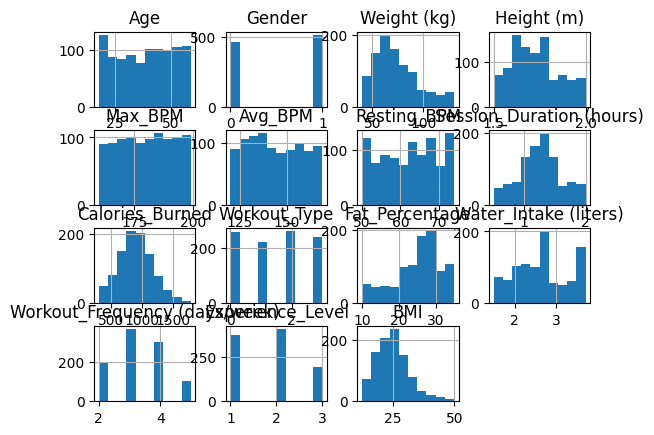

In [11]:
plt.figure(figsize=(20,20))
df.hist()

Check if the dataset is balanced.

<Axes: ylabel='Frequency'>

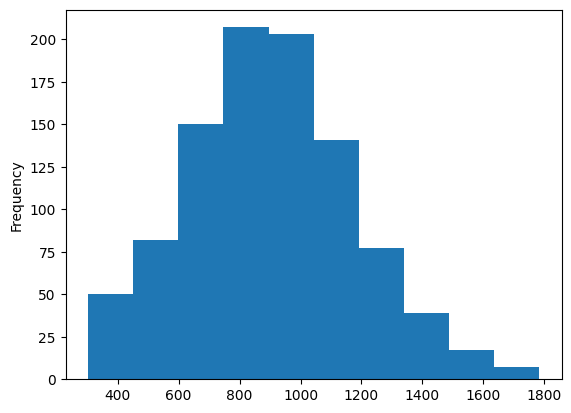

In [12]:
df.Calories_Burned.plot.hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [13]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: ylabel='Frequency'>

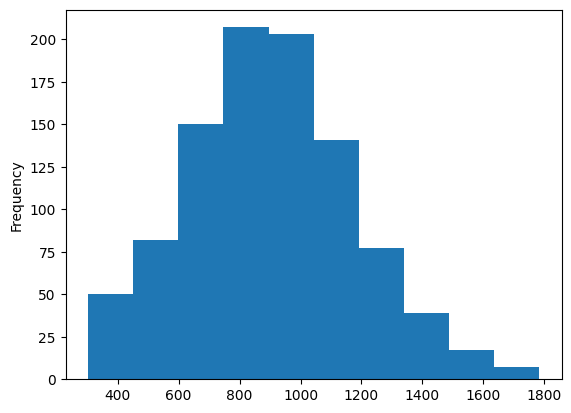

In [17]:
df['Calories_Burned'].plot.hist()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [14]:
target = 'Calories_Burned'
X = df.drop(target, axis=1)
Y = df[target]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Feature Scaling
Standardize the features appropriately.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [29]:
model = DecisionTreeRegressor(max_depth=3)

In [30]:
model.fit(X_train_scaled, Y_train)

DecisionTreeRegressor(max_depth=3)

Use the trained model to make predictions for the test set.

In [31]:
y_pred = model.predict(X_test_scaled)

Assess the performance of the model by using different classification metrics.

In [32]:
r2_score(Y_test, y_pred)

0.8736185228059656

In [45]:
print("Train R²:", model.score(X_train_scaled, Y_train))
print("Test R²:", model.score(X_test_scaled, Y_test))

Train R²: 0.9434062766078377
Test R²: 0.9134980272421114


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(X, Y)

50

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [3, 5]
}

model = DecisionTreeRegressor()
cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=rkf)
cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5], 'min_samples_split': [3, 5]})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [53]:
cv.best_score_

0.9046577876686929

In [54]:
model = cv.best_estimator_

In [55]:
y_pred = model.predict(X_test_scaled)

In [51]:
r2_score(Y_test, y_pred)

0.9134980272421114